In [13]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)

data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions
0,1099.592442,1996.918321,1267.417779,53,2203.571460
1,1572.418280,1784.746873,1330.566692,21,2151.988521
2,1677.822129,1941.861022,1398.337675,18,2178.477664
3,1545.184851,1812.801283,1301.086110,87,2032.747722
4,1645.577015,1708.588924,1484.999443,97,2132.608294
...,...,...,...,...,...
76,1692.891408,1733.134041,1621.249022,21,2078.511842
77,1836.228152,2062.468853,1370.937744,97,2236.613528
78,1684.167655,1771.342235,1436.952512,97,2146.577631
79,1828.643560,1596.632386,1302.881197,96,2181.721776


In [10]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy']:
        data[f'regret_{column}'] = data['optimal_outcome_actions'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction
0,1099.592442,1996.918321,1267.417779,53,2203.571460,1103.979018,206.653139,936.153681,1103.979018,206.653139,936.153681
1,1572.418280,1784.746873,1330.566692,21,2151.988521,579.570241,367.241648,821.421829,1683.549260,573.894788,1757.575510
2,1677.822129,1941.861022,1398.337675,18,2178.477664,500.655536,236.616642,780.139989,2184.204795,810.511430,2537.715499
3,1545.184851,1812.801283,1301.086110,87,2032.747722,487.562871,219.946439,731.661612,2671.767666,1030.457869,3269.377111
4,1645.577015,1708.588924,1484.999443,97,2132.608294,487.031279,424.019370,647.608852,3158.798945,1454.477239,3916.985962


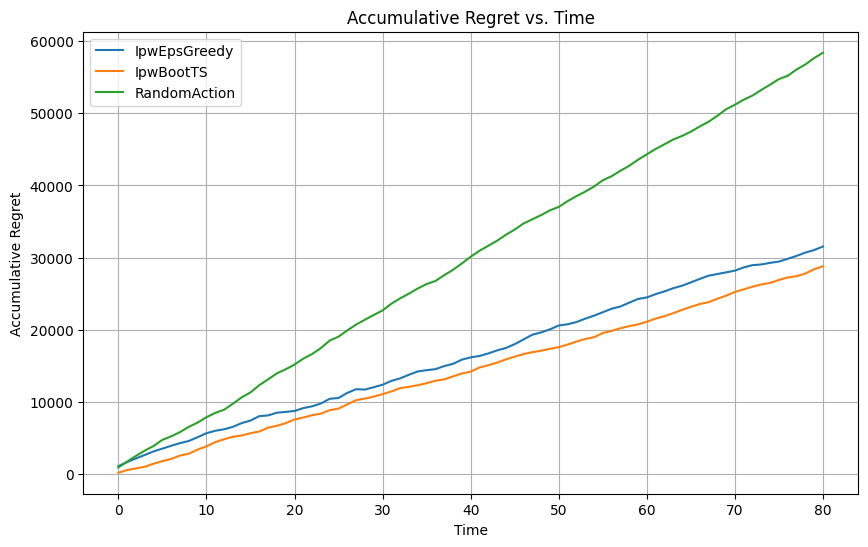

In [11]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()


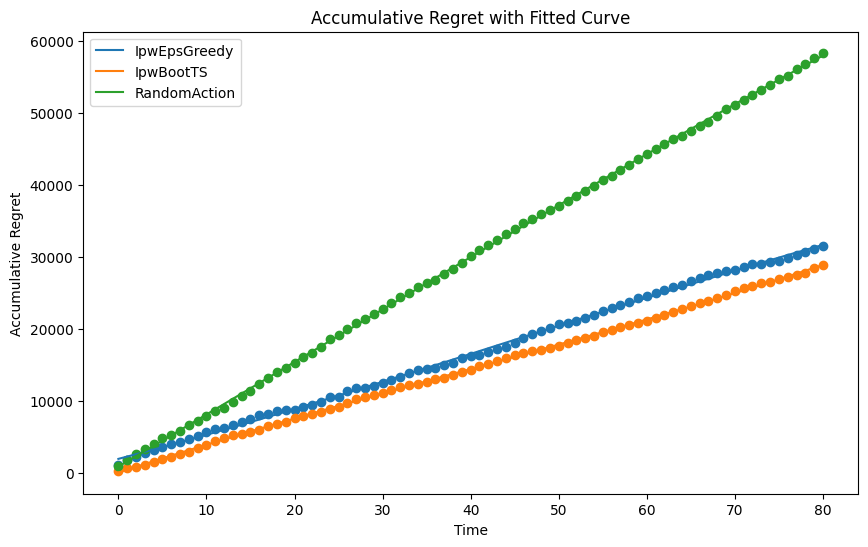

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
